In [58]:
using LinearAlgebra, QuantEcon,Parameters, Plots

In [33]:
function solve_S(A, ∑)
    max_iter=10000
    tol=1e-6
    diff = Inf
    S_old=∑
    S_new=∑
    iter=0
    while diff>tol && max_iter>=iter
        S_new=A*S_old*A'+∑*∑'
        diff=norm(S_new-S_old)
        iter+=1
        S_old=S_new
        
    end
    return S_old
end
    

solve_S (generic function with 1 method)

In [34]:
A=[0.8  -0.2 ;
    -0.1 0.7]
∑=[0.5 0.4 ;
    0.4 0.6]

solve_S(A, ∑)

2×2 Matrix{Float64}:
 0.671234  0.633473
 0.633473  0.858875

In [36]:
solve_discrete_lyapunov(A,∑*∑')

2×2 Matrix{Float64}:
 0.671231  0.633474
 0.633474  0.858874

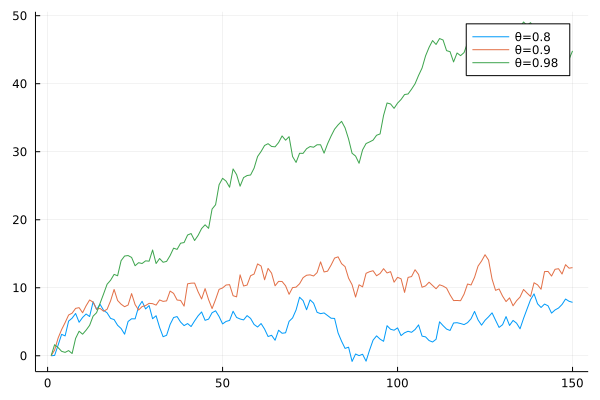

In [125]:
params =(γ=1, σ=1)

function moving_average(x)
    y=zeros(length(x))
    for i in 1:length(x)-1
        y[i+1]=(y[i]+x[i+1])/i
    end
    return x
end      

function process(T, θ)
    @unpack  γ, σ =params
    y=zeros(T)
    for i in 1:T-1
        y[i+1]=γ+θ*y[i]+σ * randn()
    end

    return y
end

function final_mean(N, θ)
    means=zeros(N)
    for i in 1:N
        means[i]=process(150, θ)[150]
    end
    return means
end
    
T=150
plot(1:T, moving_average(process(T, 0.8)), label="θ=0.8")
plot!(1:T, moving_average(process(T, 0.9)), label="θ=0.9")
plot!(1:T, moving_average(process(T, 0.98)), label="θ=0.98") 









 

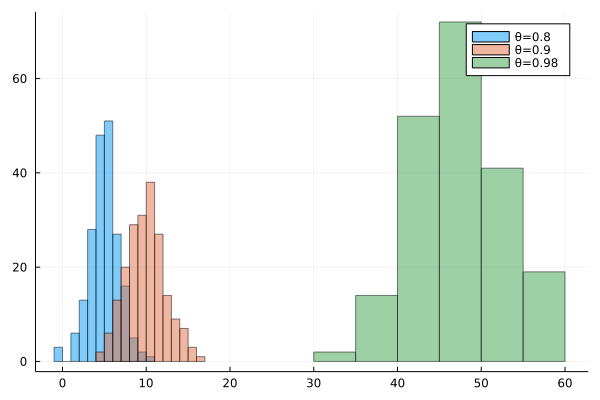

In [131]:
histogram(final_mean(200, 0.8), alpha=0.5, label="θ=0.8")
histogram!(final_mean(200, 0.9), alpha=0.5, label="θ=0.9")
histogram!(final_mean(200, 0.98), alpha=0.5, label="θ=0.98")

In [132]:
abs(mean(final_mean(200, 0.98).^2)-mean(final_mean(200, 0.98))^2)

71.1001985305843

In [133]:
abs(mean(final_mean(200, 0.8).^2)-mean(final_mean(200, 0.8))^2)

1.0998239748731038

In [134]:
abs(mean(final_mean(200, 0.9).^2)-mean(final_mean(200, 0.9))^2)

5.574360400773472

In [300]:
function least_squares(data, outcome)
    return β=inv((data'data))data'outcome
end

function simulate(N)
    @unpack a,b,c,d, σ = params
    Y=zeros(N, 50)    
    for i in 1:N
        w=randn(50)
        Y[i,:]=a*x_1.+b*x_1.^2+c*x_2.+d.+ σ*w
    end
    return Y
end

params= (a=0.1, b=0.2, c=0.5, d=1.0, σ=0.1)
x_1=randn(50)
x_2=randn(50)
outcome=simulate(2000)


2000×50 Matrix{Float64}:
 0.888536  0.935217  0.905537  …  1.11689  0.909839  1.65096  1.19797
 1.20686   1.08369   1.14495      1.32632  0.900529  1.60778  1.16056
 1.12642   0.941592  1.12581      1.40683  0.958192  1.54901  1.14425
 1.09429   1.13069   0.870015     1.5004   0.79787   1.62105  1.21804
 1.05334   1.0408    1.07002      1.34893  0.920862  1.55429  1.2414
 1.11808   1.02847   0.932265  …  1.38317  1.03445   1.57736  1.14084
 1.08547   1.05121   1.05046      1.39651  0.881945  1.4997   1.24743
 1.01379   0.794384  0.950624     1.39281  0.951186  1.54088  1.19466
 1.18302   1.09694   1.02302      1.37665  0.725251  1.57171  1.40379
 1.16559   1.02388   1.15972      1.24418  0.998193  1.6648   1.22303
 1.13585   1.07431   1.02272   …  1.21218  0.758316  1.61013  1.29796
 1.28613   1.12134   1.08561      1.44747  0.815795  1.41423  1.18782
 1.11632   1.01468   1.09193      1.36063  0.71562   1.78311  1.3204
 ⋮                             ⋱                              
 1.1

In [301]:
β=zeros(4,2000)

for i in 1:2000
    β[:,i]=least_squares([x_1 x_1.^2 x_2 ones(50)], outcome[i,:])
end
β

4×2000 Matrix{Float64}:
 0.0878176  0.0833195  0.104671  0.0764436  …  0.089319  0.0538892  0.0910583
 0.220204   0.191365   0.194264  0.203172      0.21088   0.203123   0.196382
 0.4861     0.480561   0.497346  0.546662      0.492103  0.52024    0.505921
 0.963645   1.00833    1.03118   1.0198        1.00222   0.976424   1.01805

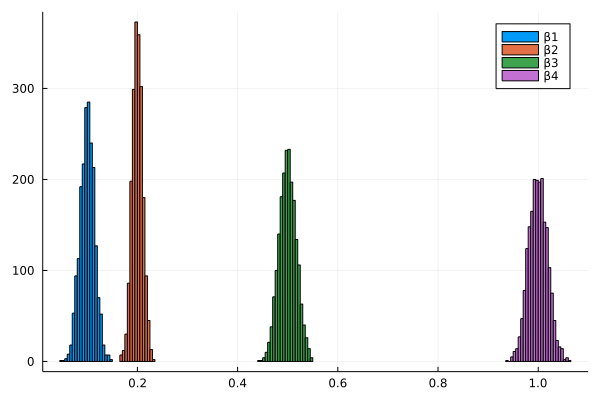

In [302]:
histogram(β[1,:], label="β1")
histogram!(β[2,:], label="β2")
histogram!(β[3,:], label="β3")
histogram!(β[4,:], label="β4")